### Importing dependencies

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading movies file
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [119]:
display(movies.head())
display(movies.shape)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


(3883, 3)

### Visualizing the words of movies to get a context of the data set

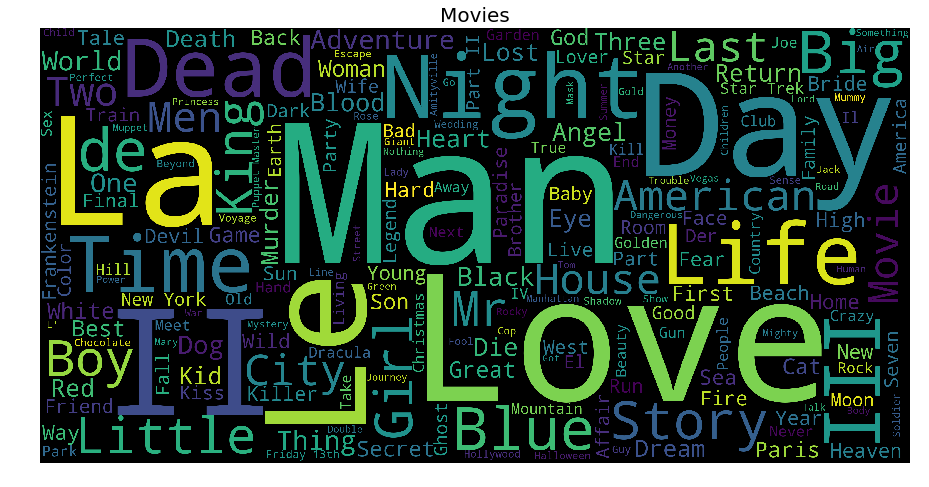

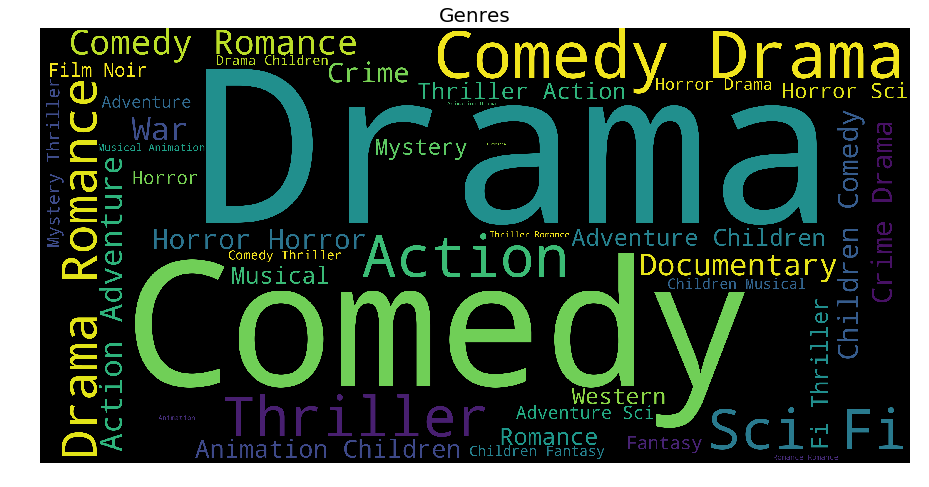

In [134]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

genres = movies['genres'].str.replace('|',' ')
genres_corpus = ' '.join(genres.fillna('').astype(str))
genres_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(genres_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title("Movies", size = 20)
plt.show()

plt.figure(figsize=(16,8))
plt.imshow(genres_wordcloud)
plt.axis('off')
plt.title("Genres", size = 20)
plt.show()

### Converting the attached genre names to arrays

In [108]:
movies['genres'] = movies['genres'].str.split('|')
# Convert genres to string value
movies['genres'] = movies['genres'].fillna("").astype('str')

### Using TfidfVectorizer to convert the array of genres to seperate columns

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(3883, 127)

### Finding the cosine similarity between the records and creating an matrix

In [112]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

### Naming the colums and indexes for knowing which movie the realtions belongs to

In [113]:
result = pd.DataFrame(data = cosine_sim, columns = movies['title'], index = movies['title'])

In [114]:
result.head(3)

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Bamboozled (2000),Bootmen (2000),Digimon: The Movie (2000),Get Carter (2000),Get Carter (1971),Meet the Parents (2000),Requiem for a Dream (2000),Tigerland (2000),Two Family House (2000),"Contender, The (2000)"
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.141936,0.090109,0.105616,0.235233,0.0,0.090109,0.209844,0.0,0.000000,...,0.235233,0.105616,0.590521,0.0,0.0,0.235233,0.0,0.0,0.0,0.0
Jumanji (1995),0.141936,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.676388,0.0,0.126079,...,0.000000,0.000000,0.237492,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Grumpier Old Men (1995),0.090109,0.000000,1.000000,0.171989,0.383061,0.0,1.000000,0.000000,0.0,0.000000,...,0.383061,0.171989,0.000000,0.0,0.0,0.383061,0.0,0.0,0.0,0.0


### Creating a function to find most related movies

In [103]:
def recommend(movie):
    from IPython.core.display import HTML
    display(HTML(pd.DataFrame(result['Karate Kid, The (1984)'].sort_values(ascending = False)).to_html()))

### Single movie example

In [104]:
recommend(movie = 'Karate Kid, The (1984)')

,"Karate Kid, The (1984)"
title,
"Institute Benjamenta, or This Dream People Call Human Life (1995)",1.000000
Hedd Wyn (1992),1.000000
"Raisin in the Sun, A (1961)",1.000000
Clubland (1998),1.000000
Safe Passage (1994),1.000000
Never Cry Wolf (1983),1.000000
Hideous Kinky (1998),1.000000
"Joyriders, The (1999)",1.000000
"Convent, The (Convento, O) (1995)",1.000000
